## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

**TASK: Run the import line below to read in the data**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/John Lang/Documents/Data Science Machine Learning/Data Science/Tensorflow/DATA/UK_foods.csv", index_col='Unnamed: 0')

In [3]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [4]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


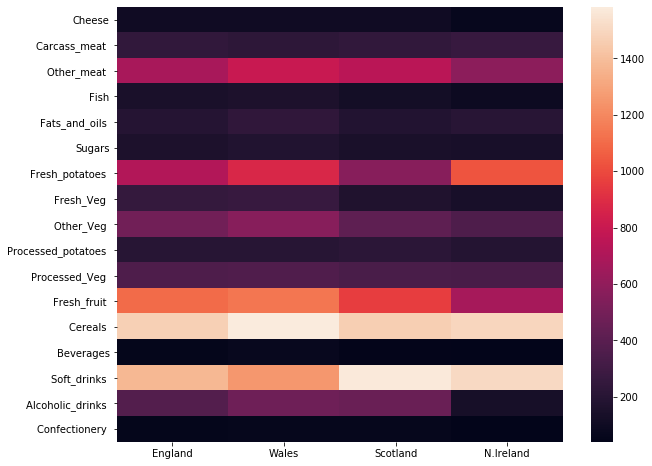

In [5]:
plt.figure(figsize=(10,8))
sns.heatmap(df)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [7]:
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

In [8]:
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

In [9]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

In [10]:
# Scale the data

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df.transpose().values)

In [13]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 1s 169ms/sample


InternalError:  Blas GEMM launch failed : a.shape=(4, 17), b.shape=(17, 8), m=4, n=8, k=17
	 [[node sequential_2/sequential/dense/MatMul (defined at <ipython-input-13-23f04c364d52>:1) ]] [Op:__inference_distributed_function_683]

Function call stack:
distributed_function
